In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [5]:
tickers = ['PG', 'MSFT','F', 'GE']
my_data= pd.DataFrame()
for t in tickers:
    my_data[t]= wb.DataReader(t, data_source='yahoo', start= '1995-1-1')['Adj Close']

In [6]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6832 entries, 1995-01-03 to 2022-02-17
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6832 non-null   float64
 1   MSFT    6832 non-null   float64
 2   F       6832 non-null   float64
 3   GE      6832 non-null   float64
dtypes: float64(4)
memory usage: 266.9 KB


In [7]:
my_data.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.971125,2.369954,4.335944,32.877308
1995-01-04,7.907223,2.387182,4.452607,32.877308
1995-01-05,7.795411,2.347804,4.413718,32.957886
1995-01-06,7.811379,2.387182,4.413718,32.796734
1995-01-09,7.779431,2.372415,4.491494,32.474407


In [8]:
my_data.tail()

,PG,MSFT,F,GE
Date,,,,
2022-02-11,156.289993,294.431213,17.549999,96.830002
2022-02-14,156.740005,294.391296,17.459999,96.599998
2022-02-15,156.820007,299.850006,18.080000,100.919998
2022-02-16,158.009995,299.500000,18.010000,101.410004
2022-02-17,159.820007,290.730011,17.540001,98.459999


In [10]:
my_data.iloc[0]

PG       7.971125
MSFT     2.369954
F        4.335944
GE      32.877308
Name: 1995-01-03 00:00:00, dtype: float64

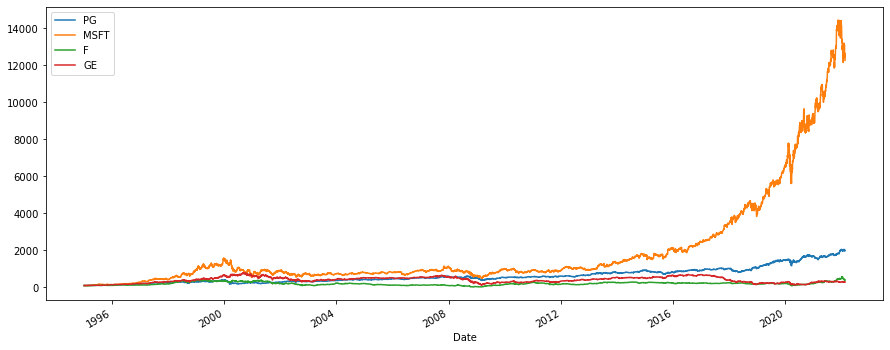

In [13]:
(my_data / my_data.iloc[0] * 100).plot(figsize = (15,6));
plt.show()

In [16]:
returns= (my_data/ my_data.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008017,0.007269,0.026906,0.000000
1995-01-05,-0.014140,-0.016495,-0.008734,0.002451
1995-01-06,0.002048,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017622,-0.009828


In [20]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [22]:
annual_returns= returns.mean(0) * 250
annual_returns

PG      0.134732
MSFT    0.224995
F       0.131374
GE      0.091442
dtype: float64

In [23]:
np.dot(annual_returns, weights)

0.1456358765289597

In [24]:
portifolio1= str(round(np.dot(annual_returns, weights), 5) * 100)+ ' %'
print(portifolio1)

14.564 %


In [26]:
weights_2= np.array([0.4,0.4, 0.15, 0.05])

In [28]:
portifolio2= str(round(np.dot(annual_returns, weights_2), 5) * 100)+ ' %'
print(portifolio1)
print(portifolio2)

14.564 %
16.817 %
